In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import torch 
import utils 

import pprint
import datasets

In [9]:
path = "out/pipeline_results/GroundingDinoTiny_SamWrapper_b_dataset_defaults_coco_val_10_09_09"
loader = datasets.ResultLoader(path)
name = loader.load_config()["dataset"]["name"]
dataset = loader.load_same_dataset() #prepar the same dataset is is in config for visuals?
# coco classes:
#
# general:
#
# categories:
#
# GT: without middle
#

loading annotations into memory...
Done (t=0.55s)
creating index...
index created!


In [10]:
result_dict = loader.load_metrics() 
# can load whatever here, then dissect the metrics dict
print(result_dict["detection"].keys())

print("\nDetection avg. IoU:")
print(result_dict["detection"]["avg iou"])

dict_keys(['TP', 'FN', 'FP', 'Recall', 'Precision', 'F1', 'avg iou', 'mAP without classes', 'mAP with classes'])

Detection avg. IoU:
0.6401699781417847


prompt list:  dataset_defaults
Detection:
 TP: 61, FP: 410, FN: 20
 Precision:         0.13
 Recall:            0.753
 F1-Measure:        0.221
 Average IoU:       0.64
     mAP:  0.4503074586391449
     mAR - small:  0.2967741787433624
     mAR - medium:  0.6578947305679321
     mAR - large:  0.8935483694076538
Segmentation:
 TP: 62, FP: 409, FN: 19
 Precision:         0.132
 Recall:            0.765
 F1-Measure:        0.225
 Average IoU:       0.589
     mAP:  0.14487549662590027
     mAR - small:  0.2571428716182709
     mAR - medium:  0.5440000295639038
     mAR - large:  0.738095223903656


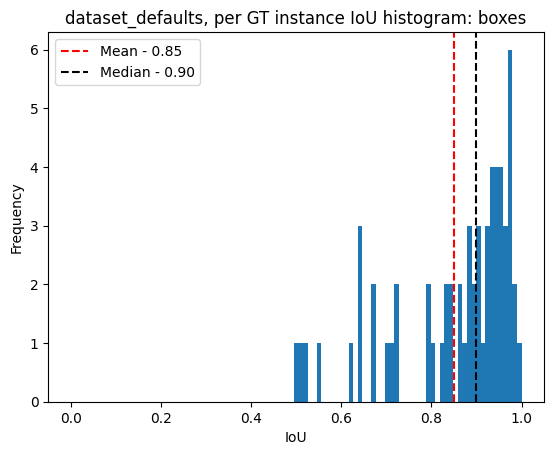

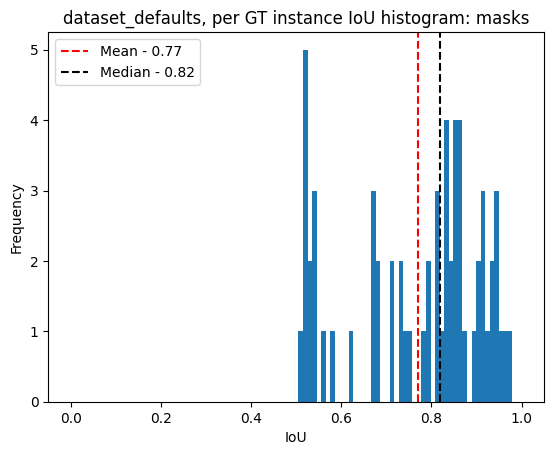

In [11]:
utils.do_overview(loader=loader)

<Axes: title={'center': 'Relative amount missed per class, coco'}, xlabel='category'>

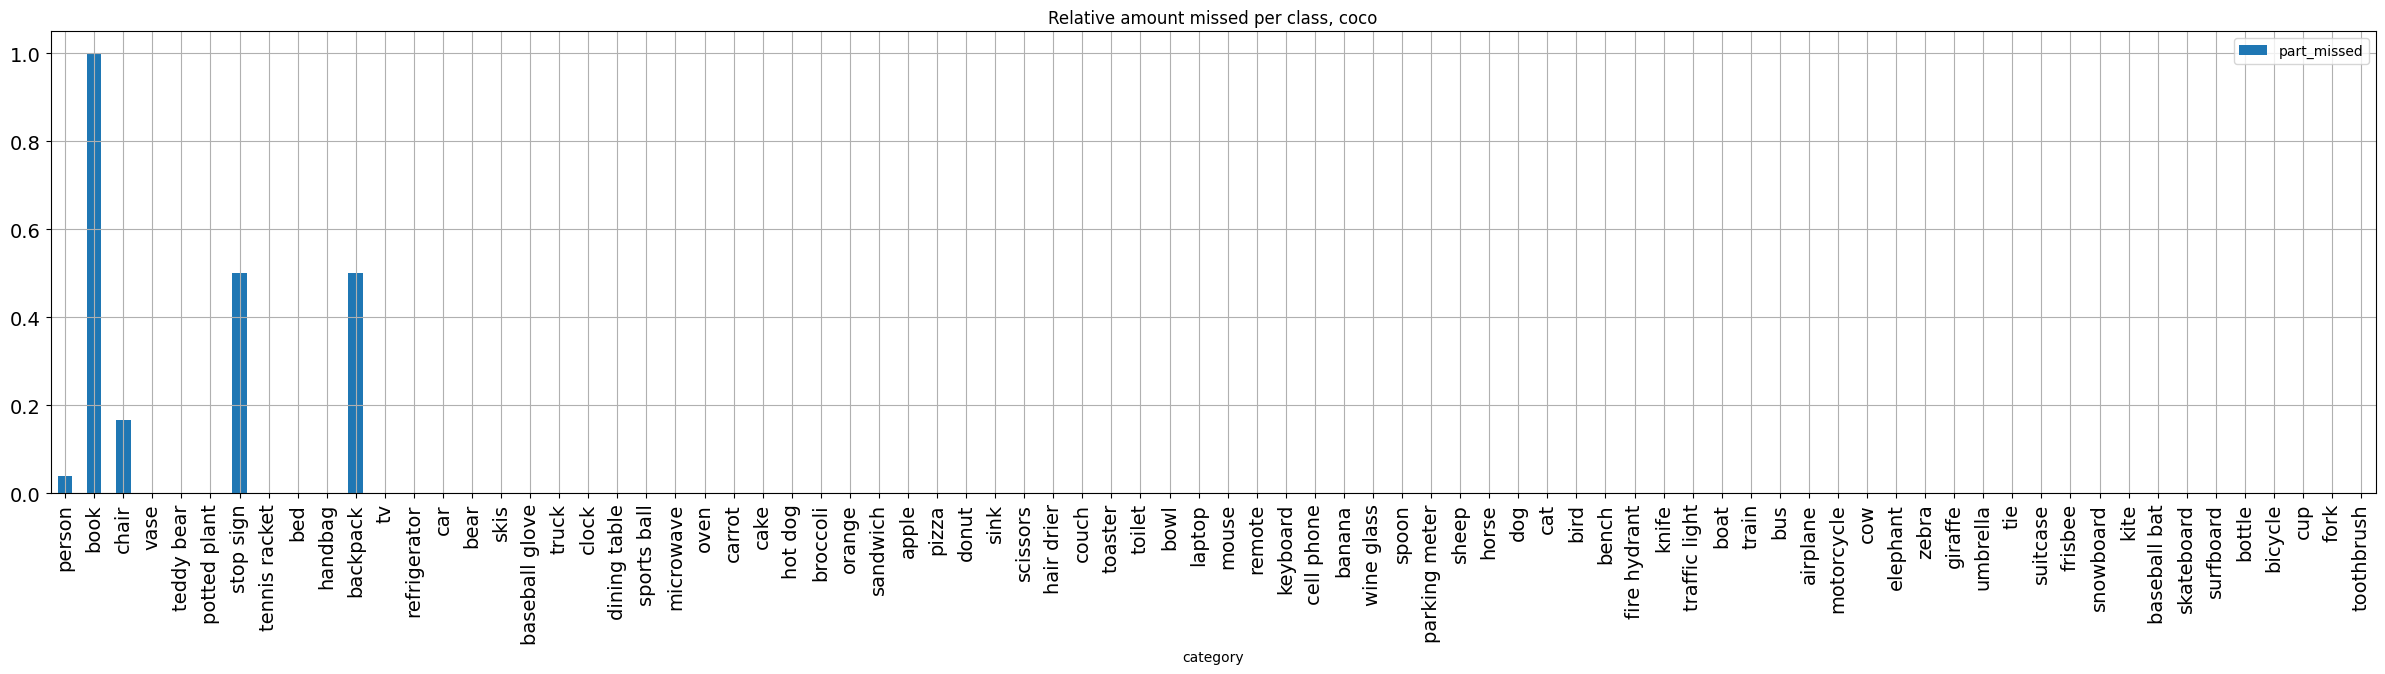

In [12]:
d = utils.load_missed_aggregate_per_class(loader, dataset)
agg_classes = d["boxes_per_class"]

# sort this frame by class by total
agg_classes = agg_classes.sort_values(by="total", ascending=False)
agg_classes[["category", "part_missed"]].plot(
    x="category",
    title=f"Relative amount missed per class, {name}",
    kind="bar",
    figsize=(30, 6),
    grid=True,
    fontsize=14,
)

### Image visualisations, per class

In [7]:
class_to_find = "bird"
class_id = dataset.class_name_to_new_ID(class_to_find)
print("class id in coco default classes: ",class_id)

# load and aggregate boxes and masks, per class and filtered by iou=0.0
d = utils.load_missed_aggregate_per_class(loader,dataset) 
missed_boxes = d["frame_boxes"]

# which images have missed boxes from this one class?
only_one_class = missed_boxes[missed_boxes["gt_class"] == class_id]
image_ids = only_one_class["image_id"].unique()

# visuals
for how_much,image_index in enumerate(image_ids):
    # filter all the boxes per image , in one image..
    if how_much>30: #early stop, too much images
        break

    idx =int(image_index)
    print(f"Image index: {idx}")
    for_image = only_one_class[only_one_class["image_id"] == idx]
    aggregated_gt = for_image["gt"].values

    image = dataset[idx]["image"]
    utils.print_masks_boxes(image=image,masks=None,boxes=aggregated_gt,scale=8)

class id in coco default classes:  14


### Comparison, per class

In [8]:
paths = [
    "./out/pipeline_results/GroundingDinoTiny_SamWrapper_b_dataset_defaults_coco_val_5000_09_04",
    "./out/pipeline_results/GroundingDinoTiny_SamWrapper_b_general_coco_val_5000_09_04",
    "./out/pipeline_results/GroundingDinoTiny_SamWrapper_b_categories_coco_val_5000_09_04",
]
names=["Coco classes","General","Categories"]

absolute, relative = utils.prompt_sets_comparison(
    paths=paths, names=names, dataset=dataset
)
absolute = absolute.sort_values(by="Totals", ascending=False)
relative = relative.sort_values(by="Totals", ascending=False)

to_show = absolute.columns[:4]
fontsize = 14
figsize=(30,6)
# plot grouped bar chart
absolute[to_show].plot(
    x="Category",
    kind="bar",
    stacked=False,
    title="Missed Instances per class",
    figsize=figsize,
    fontsize=fontsize,
)

# plot grouped bar chart
relative[to_show].plot(
    x="Category",
    kind="bar",
    stacked=False,
    title="Percentage of Missed Instances per class",
    figsize=figsize,
    fontsize=fontsize,
)
absolute[["Totals", "Category"]].plot(
    x="Category",
    title = "Total amount per class",
    kind="bar",
    figsize=figsize,
    grid=True,
    fontsize=fontsize,
)

absolute[["Totals", "Category"]].plot(
    x="Category",
    kind="bar",
    figsize=figsize,
    title="Total amount per class, log scale",
    logy=True,
    grid=True,
    fontsize=fontsize,
)

FileNotFoundError: [Errno 2] No such file or directory: './out/pipeline_results/GroundingDinoTiny_SamWrapper_b_dataset_defaults_coco_val_5000_09_04/boxes_df.pkl'

In [ ]:
# for books only? and only full dataset class names?